In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('all_data.csv')
df.rename(columns = {'Life expectancy at birth (years)': 'LEAB'}, inplace=True)
print(df.describe(include='all'))
print(df.head())

df.dtypes



       Country         Year       LEAB           GDP
count       96    96.000000  96.000000  9.600000e+01
unique       6          NaN        NaN           NaN
top      Chile          NaN        NaN           NaN
freq        16          NaN        NaN           NaN
mean       NaN  2007.500000  72.789583  3.880499e+12
std        NaN     4.633971  10.672882  5.197561e+12
min        NaN  2000.000000  44.300000  4.415703e+09
25%        NaN  2003.750000  74.475000  1.733018e+11
50%        NaN  2007.500000  76.750000  1.280220e+12
75%        NaN  2011.250000  78.900000  4.067510e+12
max        NaN  2015.000000  81.000000  1.810000e+13
  Country  Year  LEAB           GDP
0   Chile  2000  77.3  7.786093e+10
1   Chile  2001  77.3  7.097992e+10
2   Chile  2002  77.8  6.973681e+10
3   Chile  2003  77.9  7.564346e+10
4   Chile  2004  78.0  9.921039e+10


Country     object
Year         int64
LEAB       float64
GDP        float64
dtype: object

## Median, Range & Percent Change in GDP

In [3]:
print(df.groupby('Country').LEAB.median()) # median life expectancy for each country

print(df.groupby('Country').LEAB.max() - df.groupby('Country').LEAB.min()) # life expectancy range each country

print(df.groupby('Country').GDP.max() - df.groupby('Country').GDP.min()) # GDP range each country

for country in df.Country.unique():
    gdp_only = pd.Series(df.GDP[df.Country == country])
    gdp_change = gdp_only.iloc[-1] / gdp_only.iloc[0]
    print(f"{country} has had a {round(gdp_change * 100, 2)}% increase in GDP between 2000-2015 inclusive \n" )

Country
Chile                       79.00
China                       74.45
Germany                     79.85
Mexico                      75.65
United States of America    78.15
Zimbabwe                    47.40
Name: LEAB, dtype: float64
Country
Chile                        3.2
China                        4.4
Germany                      3.0
Mexico                       1.9
United States of America     2.5
Zimbabwe                    16.4
Name: LEAB, dtype: float64
Country
Chile                       2.086472e+11
China                       9.853350e+12
Germany                     1.940660e+12
Mexico                      6.148120e+11
United States of America    7.800000e+12
Zimbabwe                    1.188897e+10
Name: GDP, dtype: float64
Chile has had a 311.48% increase in GDP between 2000-2015 inclusive 

China has had a 913.42% increase in GDP between 2000-2015 inclusive 

Germany has had a 173.11% increase in GDP between 2000-2015 inclusive 

Mexico has had a 168.55% increase in

# Life Expectancy vs GDP 2000-2015 inclusive

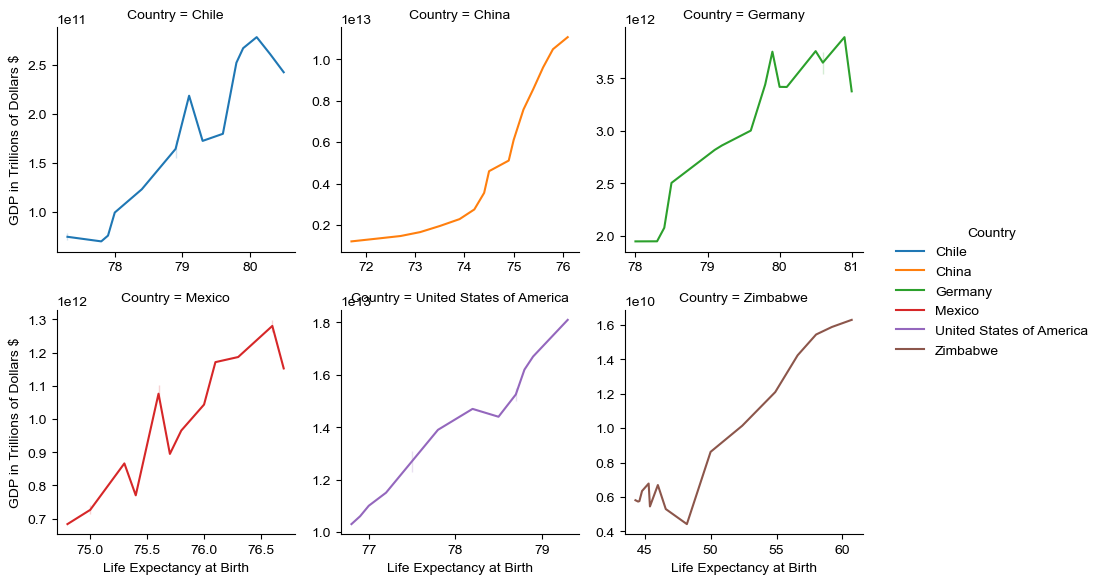

<Figure size 640x480 with 0 Axes>

In [4]:

graph1 = sns.FacetGrid(df, col = 'Country', hue = 'Country', col_wrap = 3, sharex=False, sharey=False)

graph1.map(sns.lineplot, 'LEAB', 'GDP').add_legend()\
.set_axis_labels('Life Expectancy at Birth', 'GDP in Trillions of Dollars $')

sns.set_style("whitegrid", {'axes.grid' : False})

plt.show()
plt.savefig('LEAB_vs_GDP.png')
plt.clf()


All countries exhibit a positive correlation; life expectancy increases as GDP increases. This is likely causation as richer countries can afford better healthcare, so citizens live for longer.

# Life Expectancy Boxplot

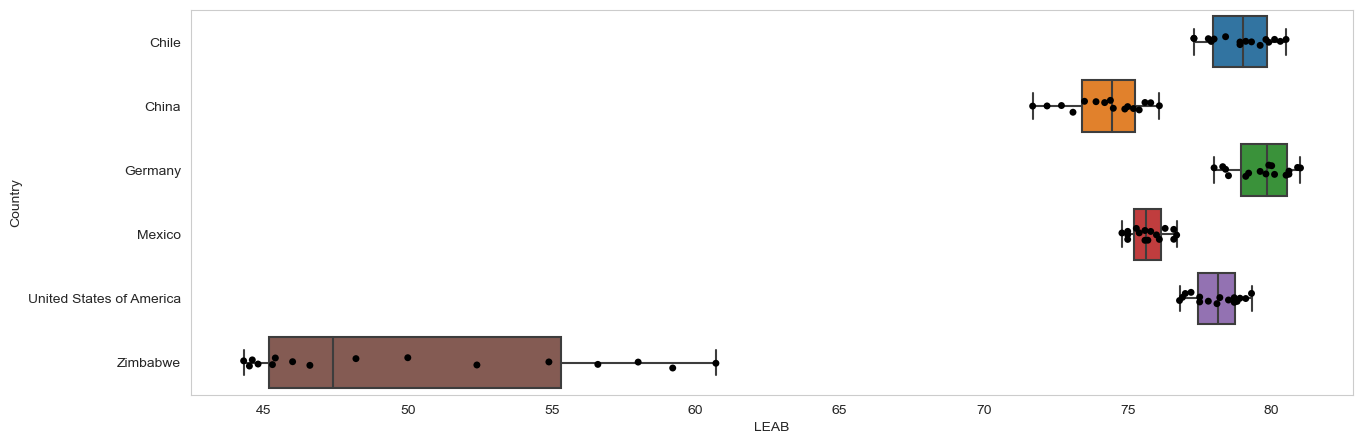

In [5]:
ax = plt.subplots(figsize=(15,5))
sns.boxplot(data=df, x = 'LEAB', y = 'Country')
sns.stripplot(data=df, x='LEAB', y='Country', jitter=True, color = 'black')
plt.show()
plt.savefig('LEAB_boxplot.png')
plt.clf()

Germany has the highest median life expectancy at 79.85, where-as Zimbabwe has the lowest; 47.40.

Zimbabwe also has a large range, at 16.4. Zimbabwe's median is so low compared to it's upper quartile because of the decline in life expectancy between 2000 and 2005.

The other countries have more similar medians, IQRs and ranges.


## GDP Boxplot

<Figure size 640x480 with 0 Axes>

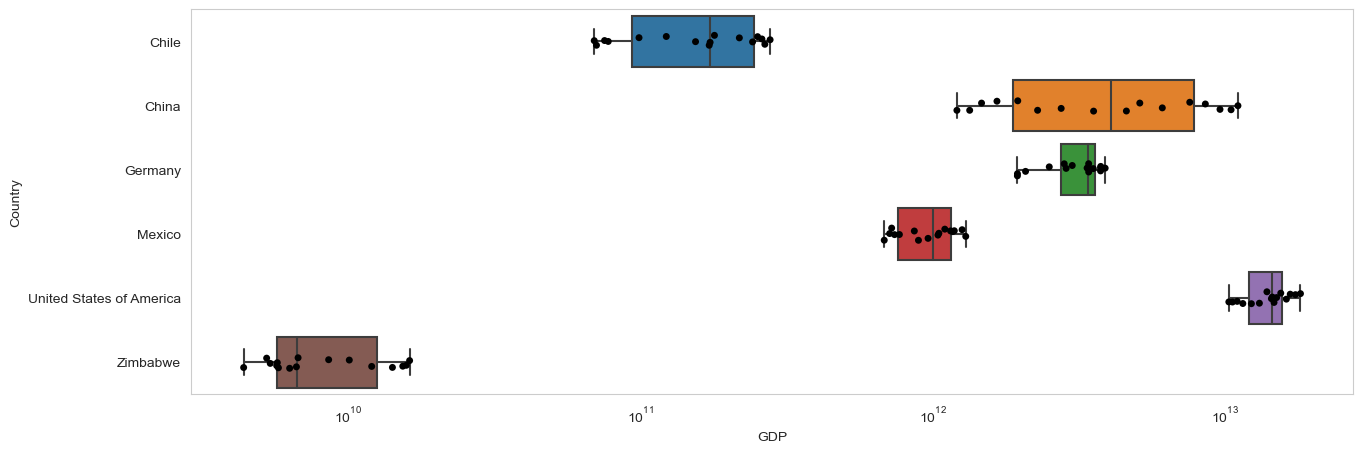

In [6]:
fig, ax = plt.subplots(figsize=(15,5))

sns.boxplot(data=df, x = 'GDP', y = 'Country')
sns.stripplot(data=df, x='GDP', y='Country', jitter=True, color = 'black')
ax.set(xscale="log")
plt.show()
plt.savefig('GDP_boxplot.png')
plt.clf()

China has the largest range and has overtaken Germany's economy in this time.
Countries that had a higher GDP in 2000, such as USA and German, exhibited a comparatively small increase in GDP when looking at China, who had a 913% increase in GDP.

## Violin Plot

<Figure size 640x480 with 0 Axes>

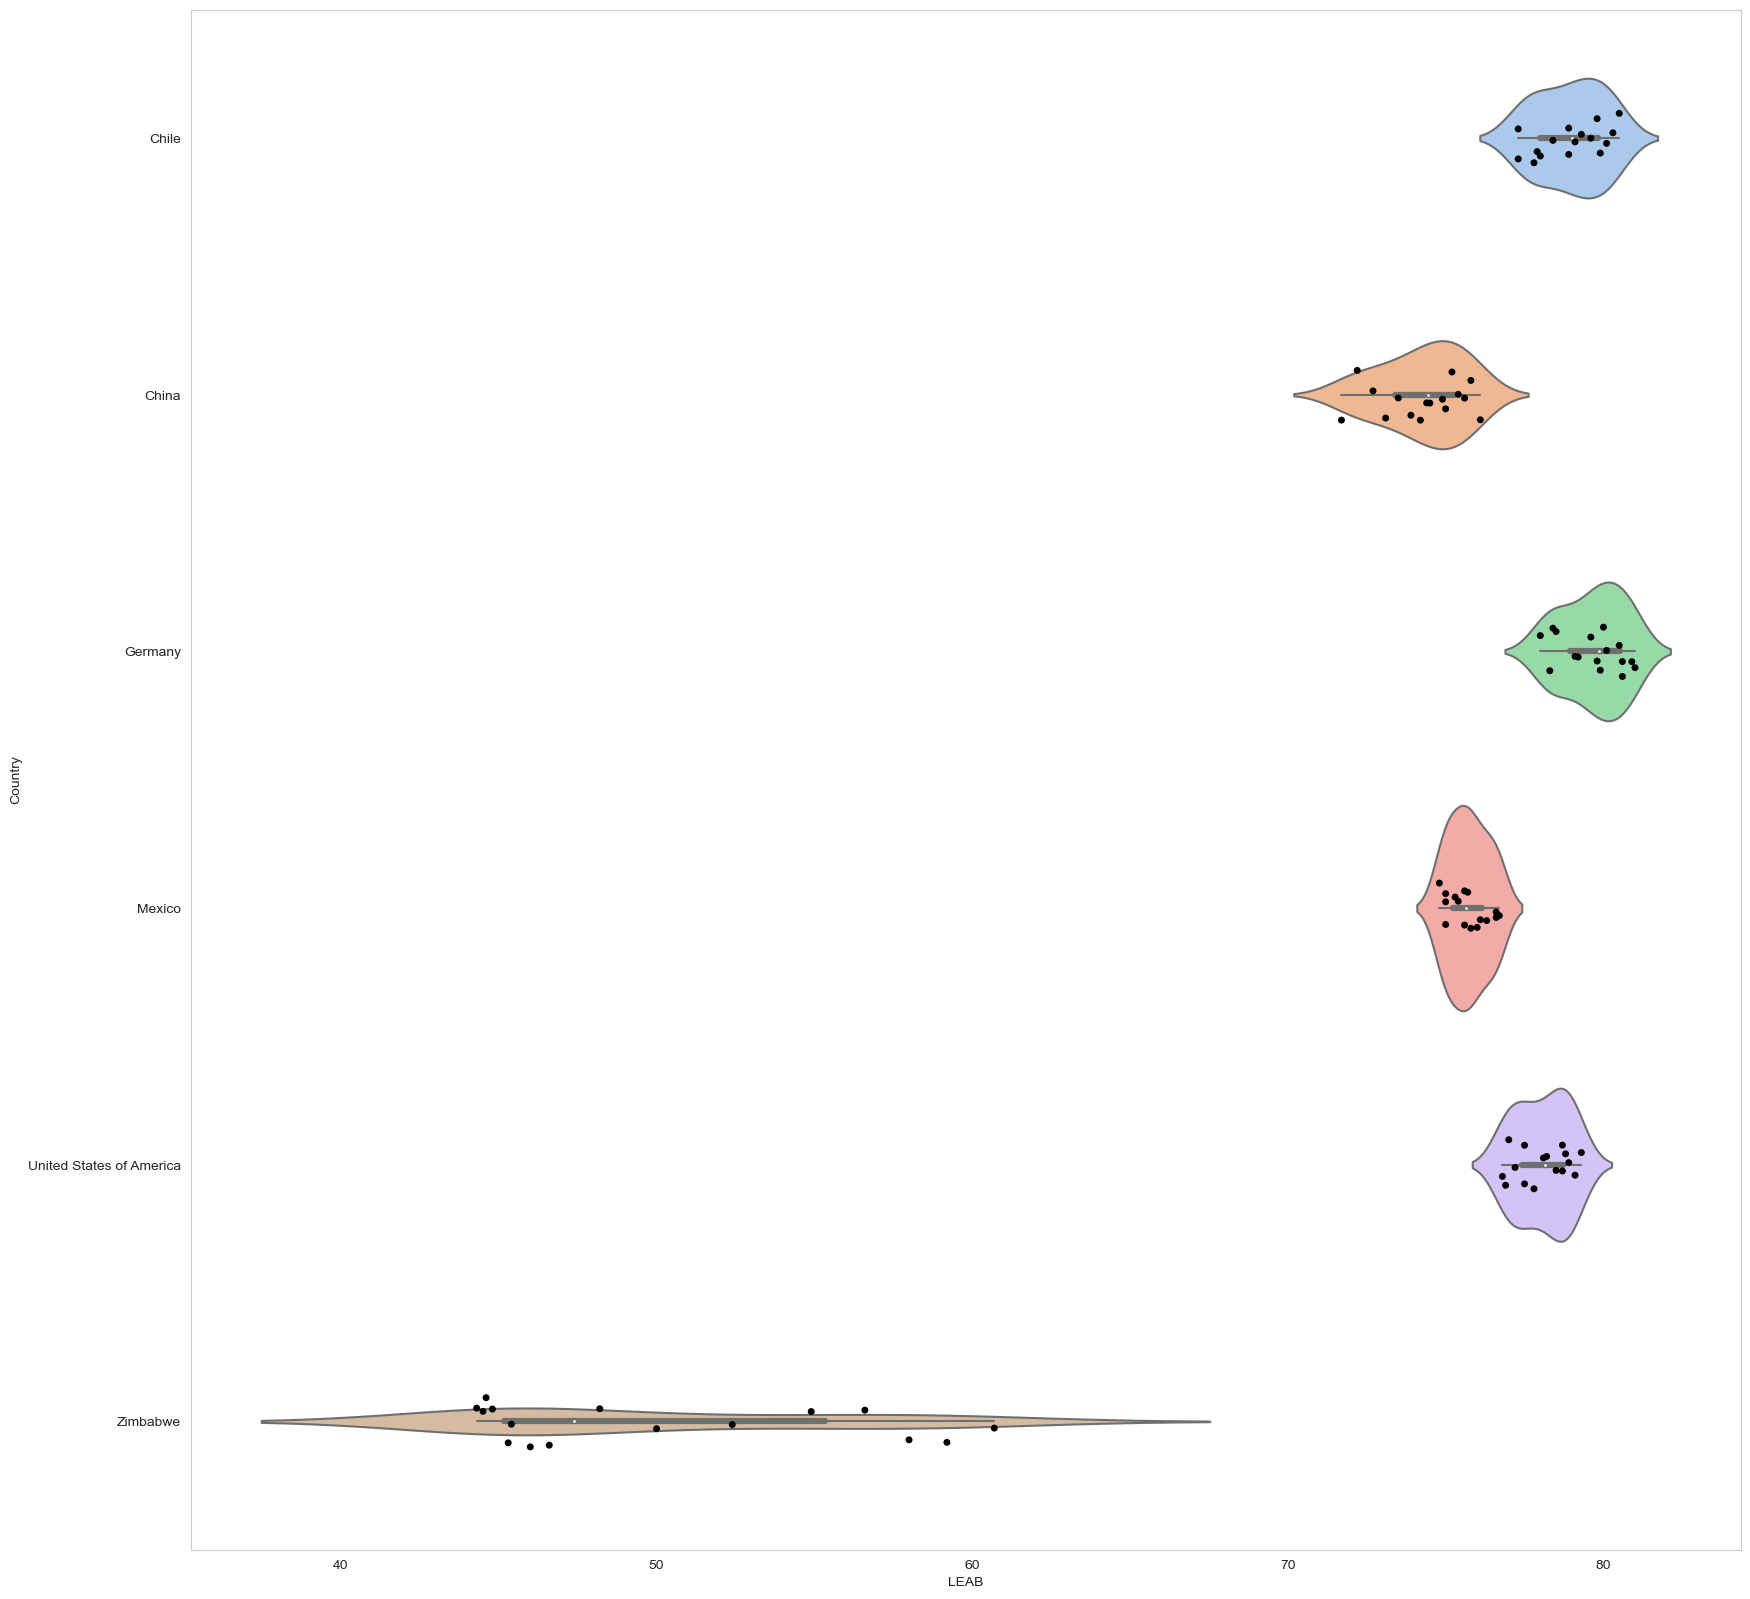

In [7]:
plt.subplots(figsize=(20,20))
sns.violinplot(x='LEAB', y='Country', data=df, palette = 'pastel')
sns.stripplot(data=df, x='LEAB', y='Country', color = 'black')

plt.show()
plt.savefig('LEAB_violin.png')
plt.clf()

Zimbabwe has such a large range that the violin plot is very skinny, but we can see a larger area around the lower quartile, indicating Zimbabwe's mode is around 46.

Mexico exhibits a symmetrical shape, indicating that the life expectancies throughtout the years are frequently around the mean.

The other countries have a larger area on the RHS of their shape, showing the data is likely left skewed; these countries have a higher frequency of a higher life expectancy.

## Linear Regression Plot

<Figure size 640x480 with 0 Axes>

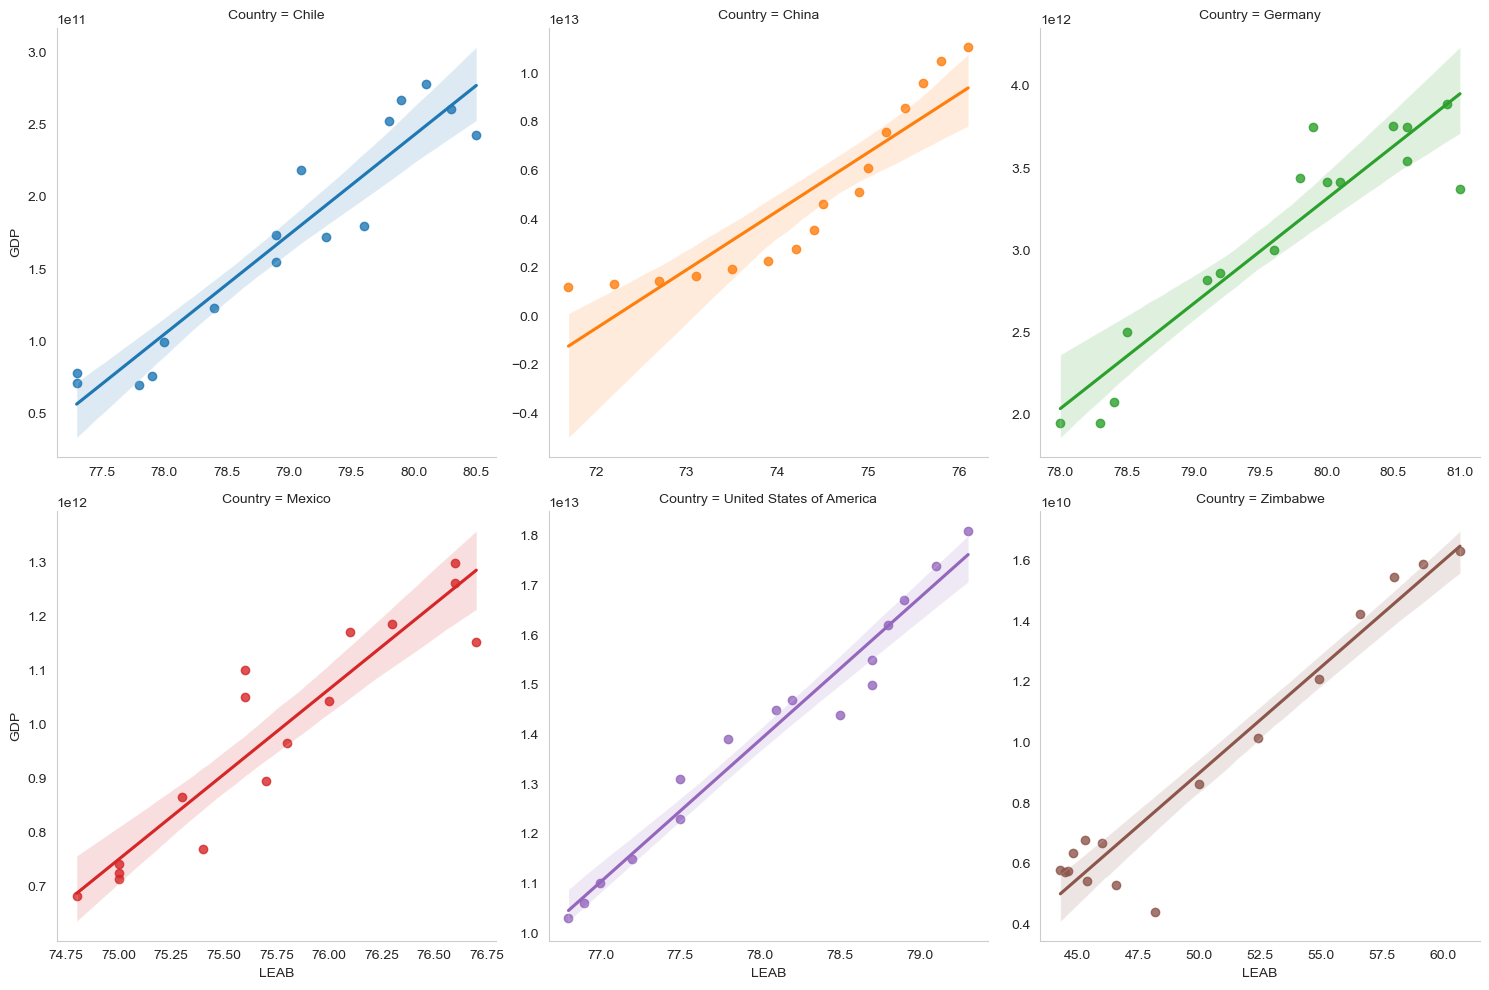

In [8]:
graph2 = sns.lmplot(x='LEAB', y='GDP', col='Country', hue='Country', col_wrap=3, data=df,
                    facet_kws = {'sharex':False, 'sharey':False})
plt.show()
plt.clf()

We see strong correlation between GDP and life expectancy, with a small number of outliers.

We can see that the linear model is suitable to model this data.

## Correlation Heatmap

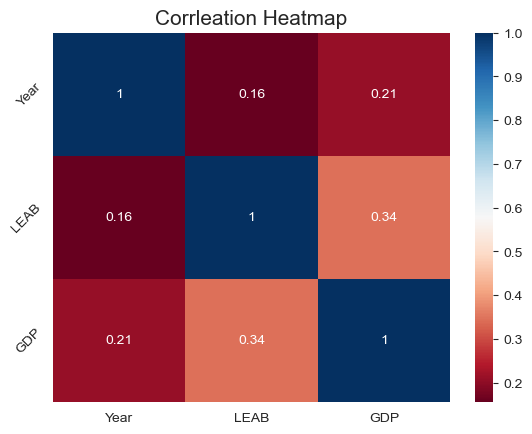

In [9]:
s = sns.heatmap(df.corr(), annot=True,cmap='RdBu')
s.set_yticklabels(s.get_yticklabels(), rotation = 45)
plt.title('Corrleation Heatmap', fontsize = 15)
plt.show()
plt.clf()

There is a weak positive correlation between life expectancy and GDP.

Very weak positive correlation between GDP and Year (0.21), and Life Expectancy and Year (0.16). 

Perform a two way ANOVA to see if there is an interaction between GDP and Year, and Life Expectancy and Year - want to know if GDP and Life Expectancy depend on the Year.

## Life Expectancy Change by Year

<Figure size 640x480 with 0 Axes>

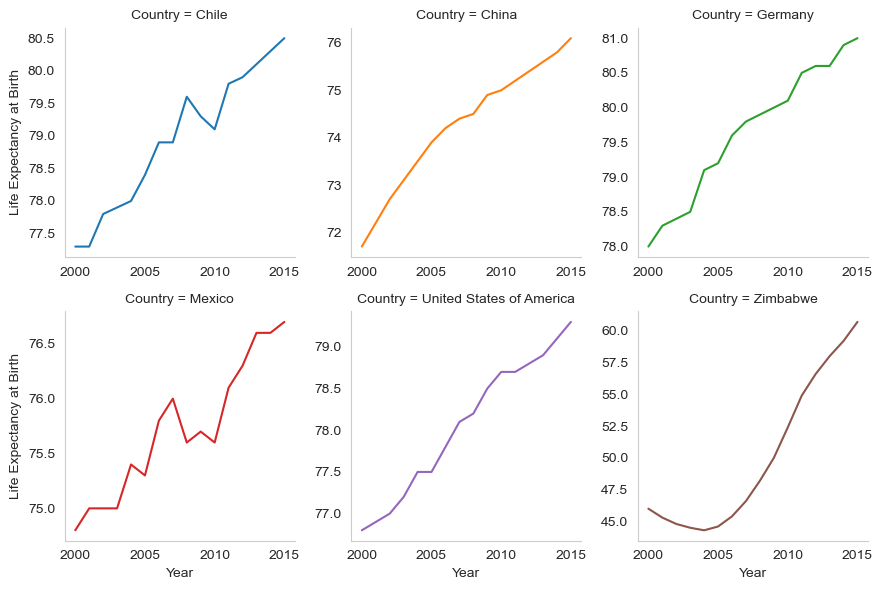

In [10]:
LEAB_over_time = sns.FacetGrid(data=df, col='Country', hue='Country', col_wrap = 3, sharex=False, sharey=False)
LEAB_over_time.map(sns.lineplot, 'Year', 'LEAB').set_axis_labels('Year', 'Life Expectancy at Birth')
plt.show()
plt.savefig('LEAB_over_time.png')
plt.clf()

All countries have a strong positive correlation between Life Expectancy and the year, with Zimbabwe's resembling an exponential graph.

## GDP Change by Year

<Figure size 640x480 with 0 Axes>

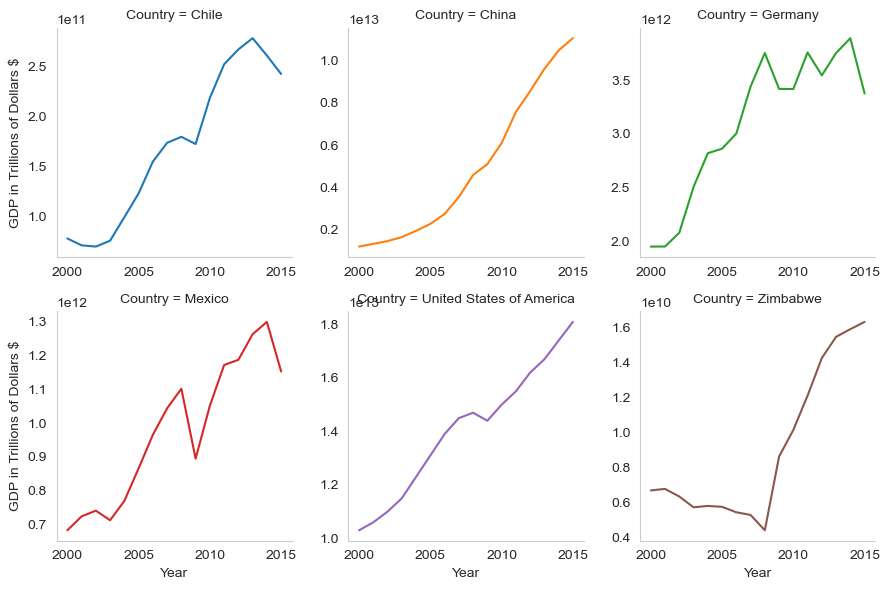

In [11]:
GDP_over_time = sns.FacetGrid(data=df, col='Country', hue='Country', col_wrap = 3, sharex=False, sharey=False)
GDP_over_time.map(sns.lineplot, 'Year', 'GDP').set_axis_labels('Year', 'GDP in Trillions of Dollars $')
plt.show()
plt.savefig('GDP_over_time.png')
plt.clf()

Zimbabwe had negative growth until around 2008, and then experienced an extreme rate of growth.

Germany's GDP started steadily fluctuating in 2008 between 3.4e12 and 3.8e12.

China has experienced exponential growth in its GDP.

USA has experienced constant growth, with a small decline in 2008. Chile is similar, but their GDP begun a decline in 2013.

Mexico experienced a steep decline in 2008, but quickly rebounded. Like Chile, Mexico had experienced a drop in GDP in 2013. Could this similarity be related to them both being Latin American countries?
The first two paragraphs of this [article](https://www.theatlantic.com/international/archive/2015/10/latin-america-economic-crisis-middle-class/409675/) give a brief answer to this question.